# 트리의 앙상블

* 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘이 앙상블 모델(ensemble learning)입니다. 
* 이 알고리즘은 대부분 결정 트리를 기반으로 만들어져 있습니다. 

* 정형 데이터
    * csv, 엑셀, json, xml등 구조화 된 방식으로 된 데이터
* 비정형 데이터
    * 이미지, 영상, 텍스트

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 랜덤포레스트
* 랜덤 포레스트(random forest)는 앙상블 학습의 대표 주자 중 하나로 안정적인 성능 덕분에 널리 사용되고 있습니다. 
* 이름 자체로 유출할 수 있듯이 랜덤 포레스트는 결정 트리를 랜덤하게 만들어 나무의 숲을 만듭니다. 
* 그리고 각 결정 트리의 예측을 사용해 최종 예측을 만듭니다. 

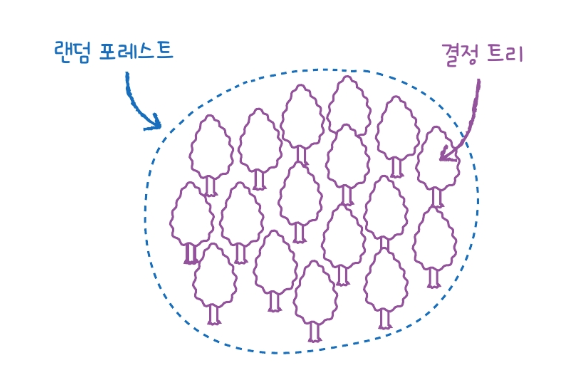

* 랜덤 포레스트는 각 트리를 훈련하기 위한 데이터를 랜덤하게 만드는데, 이 데이터를 만드는 방법이 톡특합니다. 
* 우리가 입력한 훈련 데이터에서 랜덤하게 샘플을 추출하여 훈련 데이터를 만듭니다. 이 때 한 샘플이 중복되어 추출될 수도 있습니다. 

    * 예를 들어, 1000개 샘플이 담긴 가방에서 100개씩 샘플을 뽑는다면 먼저 1개를 뽑고, 뽑았던 1개를 다시 가방에 넣습니다. 
    * 이런 식으로 계속해서 100개를 가방에서 뽑으면 중복된 샘플을 뽑을 수 있습니다. 
    * 이렇게 만들어진 샘플을 부트스트랩 샘플(bootstrap sample)이라고 부릅니다. 
    * 기본적으로 부트스트랩 샘플은 훈련 세트의 크기와 같게 만듭니다.

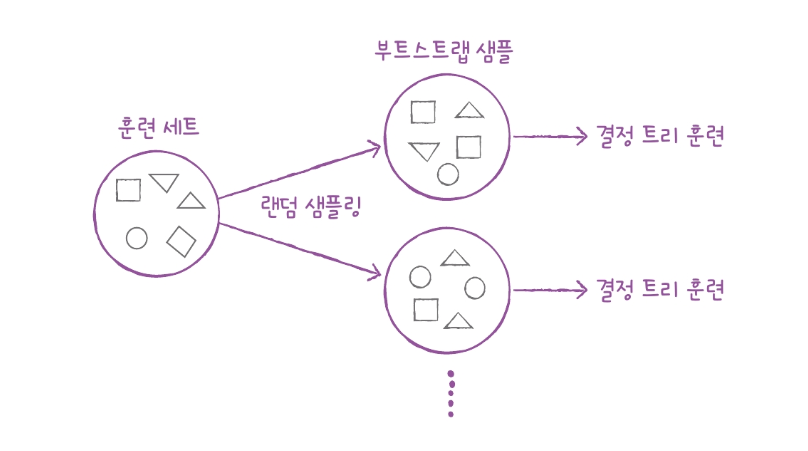

* 또한 각 노드를 분할할 때 전체 특성 중에서 일부 특성을 무작위로 고른 다음 이 중에서 최선의 분할을 찾습니다. 
* 분류 모델인 RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근만큼의 특성을 선택합니다. 
* 즉 4개의 특성이 있다면 노드마다 2개를 랜덤하게 선택하여 사용합니다. 
* 회귀 모델인 RandomForestRegressor는 전체 특성을 사용합니다. 

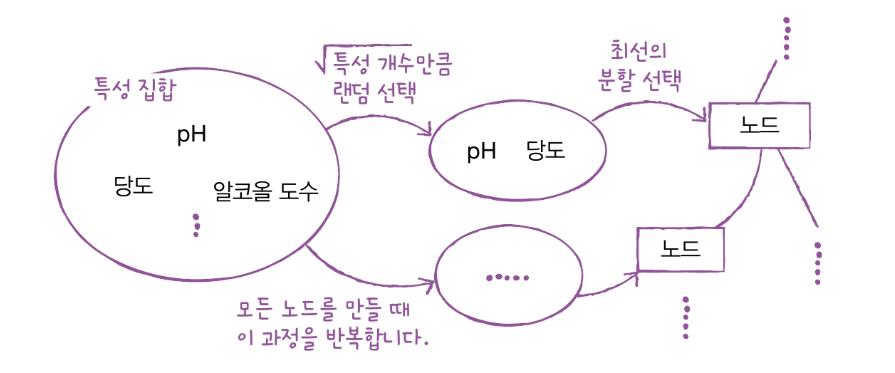

* 사이킷런의 랜덤 포레스트는 기본적으로 100개의 결정 트리를 이런 방식으로 훈련합니다. 그 다음 분류일 때는 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼습니다. 
* 회귀일때는 평균을 출력합니다. 
* 랜덤 포레스트는 랜덤하게 선택한 샘플과 특성을 사용하기 때문에 훈련 세트에 과대적합되는 것을 막아주고 검증 세트와 테스트 세트에서 안정적인 성능을 얻을 수 있습니다. 
* 종종 기본 매개변수 설정만으로도 아주 좋은 결과를 냅니다. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine-date')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

* return_train_score 매개변수를 True로 지정하면 검증 점수뿐만 아니라 훈련 세트에 대한 점수도 같이 반환합니다. 
* 훈련 세트와 검증 세트의 점수를 비교하면 과대적합을 파악하는데 용이합니다.

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


* 변수 중요도 출력

In [3]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


* 결정 트리의 중요도하고 값이 다른 이유는 랜덤 포레스트가 특성의 일부를 랜덤하게 선택하여 결정 트리를 훈련시키기 때문입니다. 
* 그 결과 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻습니다.
* 이는 과대적합을 줄이고 일반화 성능을 높이는 데 도움이 됩니다. 

-----

### OOB(Out of Bag)
* 부트스트랩 샘플에 포함되지 않고 남는 샘플을 OOB 샘플이라고 합니다. 
* 이 남은 샘플을 사용하여 부트스트랩 샘플로 훈련한 결정 트리를 평가할 수 있습니다. 
* oob_score 파라미터의 값을 True로 지정하면 사용할 수 있습니다. 

In [8]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


## 엑스트라트리
* 엑스트라 트리(Extra Trees)는 랜덤 포레스트와 매우 비슷하게 동작합니다. 
* 기본적으로 100개의 결정 트리를 훈련합니다. 
* 랜덤 포레스트와 차이점은 부트스트랩 샘플을 사용하지 않는다는 점입니다. 
* 결정 트리를 만들 때 전체 훈련 세트를 사용합니다. 대신 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할합니다. 
* DesicionTreeClassifier의 splitter 매개변수를 random으로 지정하면 엑스트라 트리가 사용하는 결정 트리가 됩니다.
* 하나의 결정 트리에서 특성을 무작위로 분할한다면 성능이 낮아지겠지만 많은 트리를 앙상블하기 때문에 과대적합을 막고 검증 세트의 점수를 높이는 효과를 볼수 있습니다. 

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [10]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


* 보통 엑스트라 트리가 무작위성이 좀 더 크기 때문에 랜덤 포레스트보다 더 많은 결정 트리를 훈련해야 합니다. 
* 하지만 랜덤하게 노드를 분할하기 때문에 빠른 계산 속도가 엑스트라 트리의 장점입니다.
* 결정 트리는 최적의 분할을 찾는 데 시간을 많이 소모합니다. 특히 고려해야 할 특성의 개수가 많을 때 더 그렇습니다. 만약 무작위로 나눈다면 휠씬 빨리 트리를 구성할 수 있습니다. 

## 그레이디언트 부스팅
* gradient boosting은 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블 하는 방식입니다. 
* 사이킷런의 GradientBoostingClassifier는 기본적으로 깊이가 3인 결정 트리를 100개 사용합니다. 
* 깊이가 얕은 결정 트리를 사용하기 때문에 과대적합에 강하고 일반적으로 높은 일반화 성능을 기대할 수 있습니다. 
* 그레디언트는 경사 하강법을 사용합니다. 이 방법을 통해서 트리를 앙상블에 추가합니다. 
* 분류에서는 로지스틱 손실 함수를 사용하고 회귀에서는 평균 제곱 오차 함수를 사용합니다. 

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [12]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.02, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8872908264055726 0.8720428296438882


In [13]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.12185869 0.74162442 0.13651689]


* 일반적으로 그레이디언트 부스팅이 랜덤 포레스트보다 조금 더 높은 성능을 얻을 수 있습니다. 하지만 순서대로 트리를 추가하기 때문에 훈련 속도가 느립니다. 

## 히스토그램 기반 부스팅
* 히스토그램 기반 그레디언트 부스팅(Histogram-based Gradient Boosting)은 정형 데이터를 다루는 머신러닝 알고리즘 중에서 가장 인기 있는 알고리즘 입니다. 
* 먼저 입력 특성을 256개의 구간으로 나눕니다. 따라서 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있습니다. 
* max_iter 매개변수는 부스팅 반복 횟수를 지정합니다. 

In [14]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [15]:
hgb.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [16]:
hgb.score(test_input, test_target)

0.8723076923076923

In [21]:
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats = 10, random_state=42, n_jobs=-1)

In [22]:
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


#### XGBoost

In [17]:
conda install -c anaconda py-xgboost


Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


#### LightGBM

In [ ]:
conda install -c conda-forge lightgbm

conda install은 자꾸 vsc가 켜짐

In [ ]:
pip install lightgbm

In [20]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


In [ ]:
np.__version__

In [ ]:
뭐 복붙 한거긴한데 뭘한거지?